In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Load the raw data
df_raw = pd.read_csv("/content/X.csv")

In [3]:
df_raw.shape

(511, 45769)

In [4]:
# Compute the PCA for the raw data
pca_raw = PCA()
pca_raw.fit(df_raw)
explained_variance_ratio_raw = pca_raw.explained_variance_ratio_

In [5]:
# Compute the PCA for the log-transformed data
data_t = np.log2(df_raw + 1)
pca_t = PCA()
pca_t.fit(data_t)
explained_variance_ratio_t = pca_t.explained_variance_ratio_

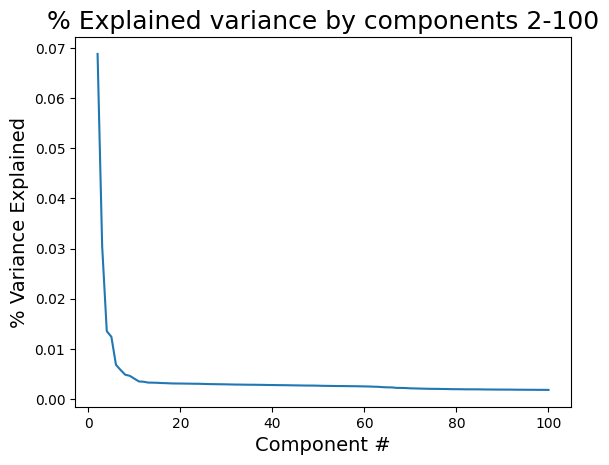

In [6]:
# Plot the explained variance for components 2 to 100 for the log-transformed data
plt.plot(np.arange(2, 101), explained_variance_ratio_t[1:100])
plt.title("% Explained variance by components 2-100", size=18)
plt.xlabel("Component #", size=14)
plt.ylabel("% Variance Explained", size=14)
plt.show()

In [7]:
# Print the percentage of variance explained by the first principal component
percentage_variance_explained_raw = explained_variance_ratio_raw[0] * 100
percentage_variance_explained_log_transformed = explained_variance_ratio_t[0] * 100

In [8]:
print(f"Percentage variance explained by the first principal component (raw data): {percentage_variance_explained_raw:.2f}%")
print(f"Percentage variance explained by the first principal component (log-transformed data): {percentage_variance_explained_log_transformed:.2f}%")

Percentage variance explained by the first principal component (raw data): 42.78%
Percentage variance explained by the first principal component (log-transformed data): 13.89%


Number of PCs needed for raw data: 36
Number of PCs needed for log-transformed data: 339


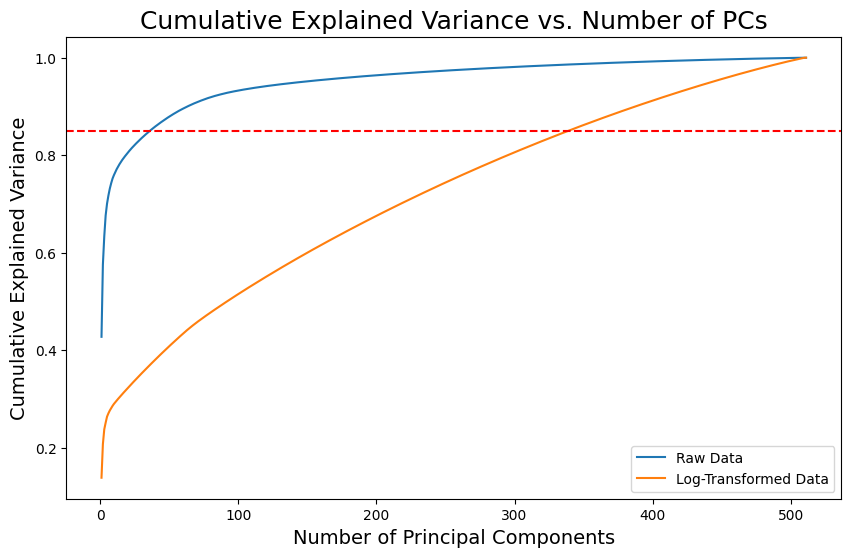

In [9]:
# Calculate cumulative explained variance for raw data
cumulative_explained_variance_raw = np.cumsum(explained_variance_ratio_raw)

# Calculate cumulative explained variance for log-transformed data
cumulative_explained_variance_log = np.cumsum(explained_variance_ratio_t)

# Find the number of PCs needed to explain 85% variance for raw data
num_pcs_raw = np.argmax(cumulative_explained_variance_raw >= 0.85) + 1

# Find the number of PCs needed to explain 85% variance for log-transformed data
num_pcs_log = np.argmax(cumulative_explained_variance_log >= 0.85) + 1

print(f"Number of PCs needed for raw data: {num_pcs_raw}")
print(f"Number of PCs needed for log-transformed data: {num_pcs_log}")

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_explained_variance_raw) + 1), cumulative_explained_variance_raw, label='Raw Data')
plt.plot(np.arange(1, len(cumulative_explained_variance_log) + 1), cumulative_explained_variance_log, label='Log-Transformed Data')
plt.axhline(y=0.85, color='r', linestyle='--')
plt.title("Cumulative Explained Variance vs. Number of PCs", size=18)
plt.xlabel("Number of Principal Components", size=14)
plt.ylabel("Cumulative Explained Variance", size=14)
plt.legend()
plt.show()


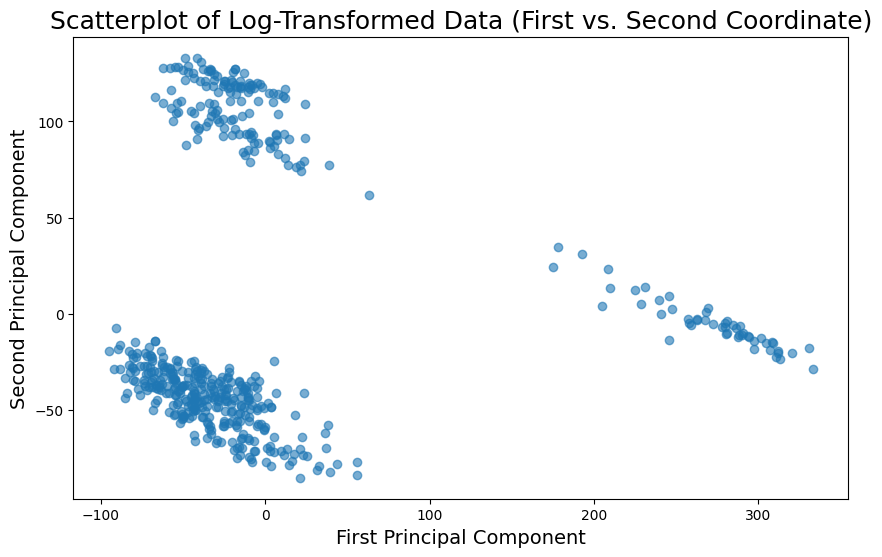

In [14]:
# Get the first and second coordinates of the log-transformed data
first_coordinate = pca_t.transform(data_t)[:, 0]
second_coordinate = pca_t.transform(data_t)[:, 1]

# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(first_coordinate, second_coordinate, alpha=0.6)
plt.title("Scatterplot of Log-Transformed Data (First vs. Second Coordinate)", size=18)
plt.xlabel("First Principal Component", size=14)
plt.ylabel("Second Principal Component", size=14)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


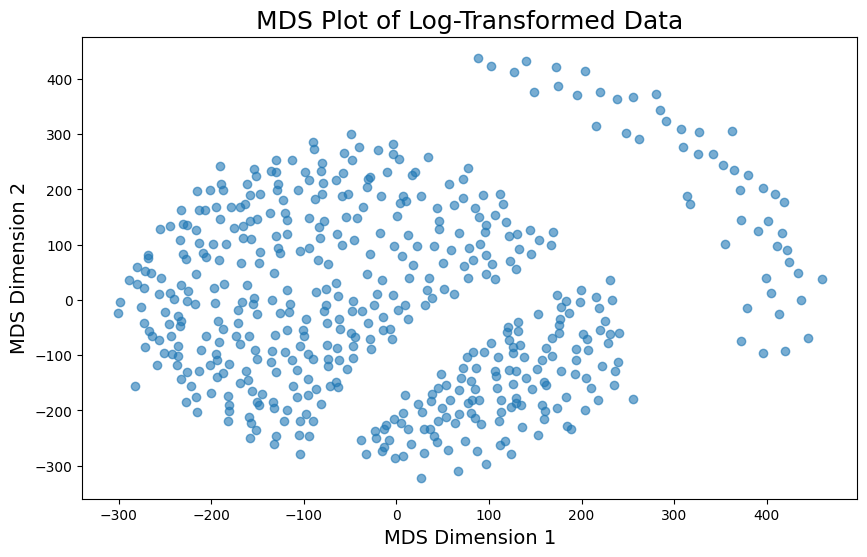

In [15]:
from sklearn.manifold import MDS

# Apply MDS to the log-transformed data
mds = MDS(n_components=2, random_state=42)
mds_transformed = mds.fit_transform(data_t)

# Create a scatterplot for the MDS transformed data
plt.figure(figsize=(10, 6))
plt.scatter(mds_transformed[:, 0], mds_transformed[:, 1], alpha=0.6)
plt.title("MDS Plot of Log-Transformed Data", size=18)
plt.xlabel("MDS Dimension 1", size=14)
plt.ylabel("MDS Dimension 2", size=14)
plt.show()


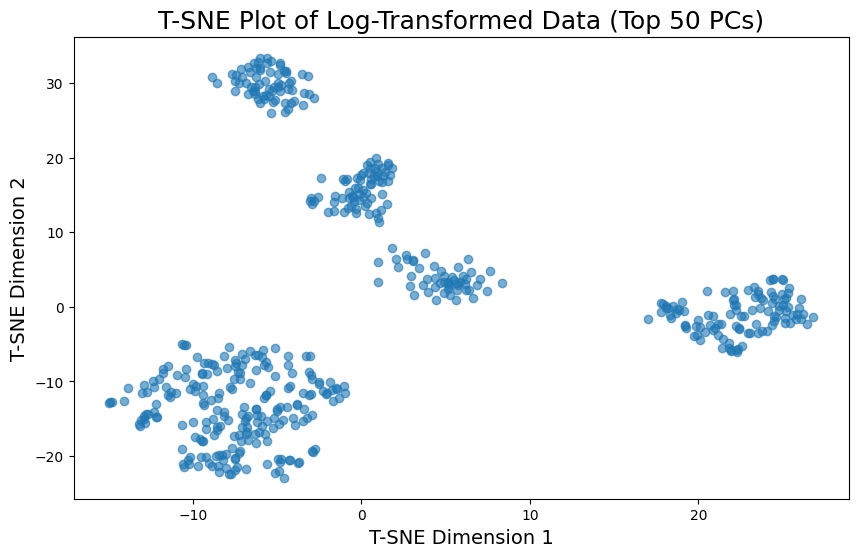

In [16]:
from sklearn.manifold import TSNE

# Project the log-transformed data onto the top 50 PCs
pca_50 = PCA(n_components=50)
data_pca_50 = pca_50.fit_transform(data_t)

# Apply T-SNE to the PCA-transformed data
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
tsne_transformed = tsne.fit_transform(data_pca_50)

# Create a scatterplot for the T-SNE transformed data
plt.figure(figsize=(10, 6))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], alpha=0.6)
plt.title("T-SNE Plot of Log-Transformed Data (Top 50 PCs)", size=18)
plt.xlabel("T-SNE Dimension 1", size=14)
plt.ylabel("T-SNE Dimension 2", size=14)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


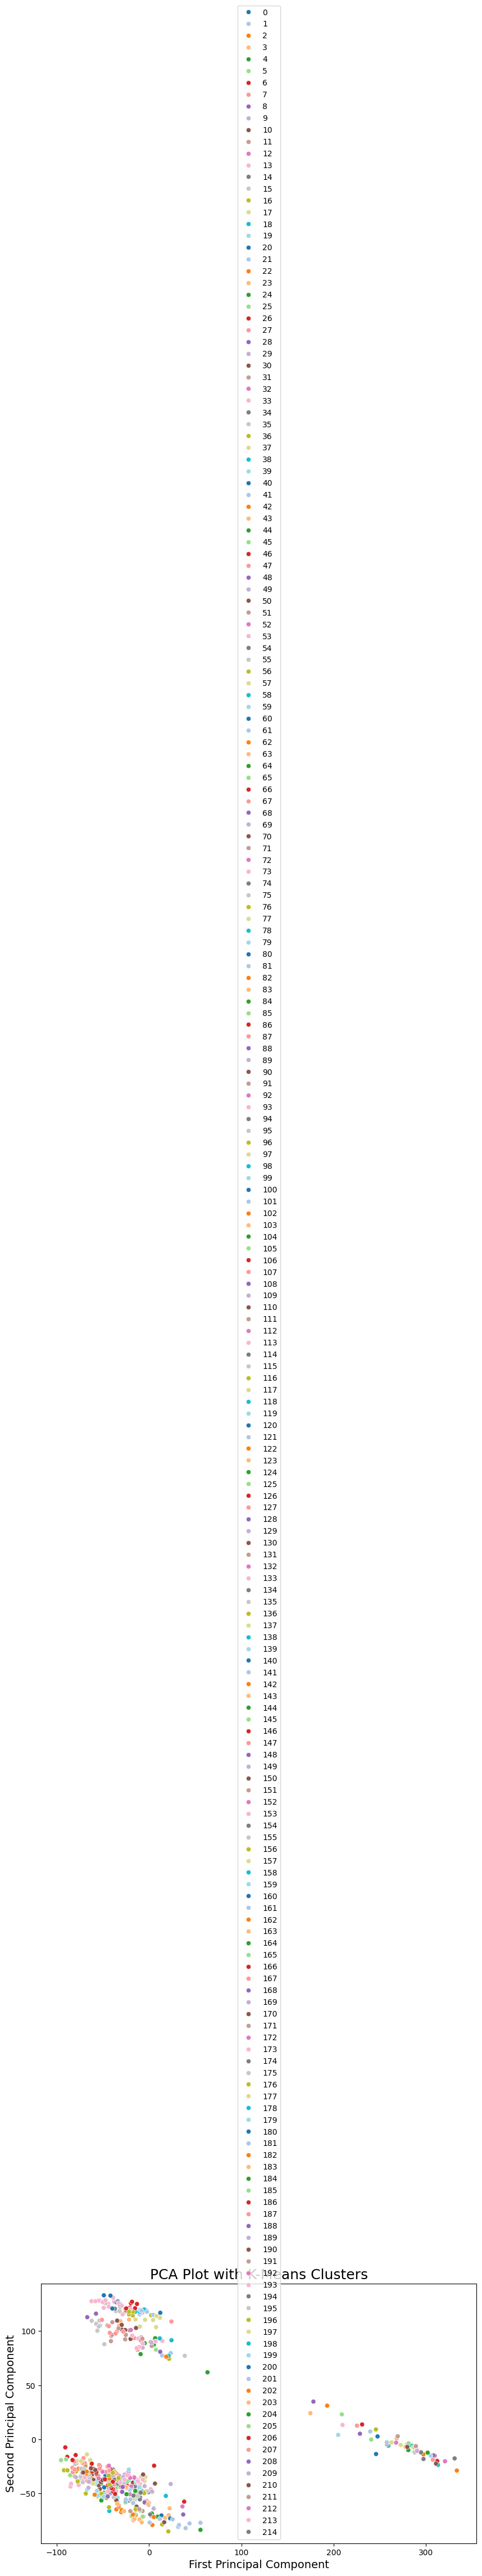

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


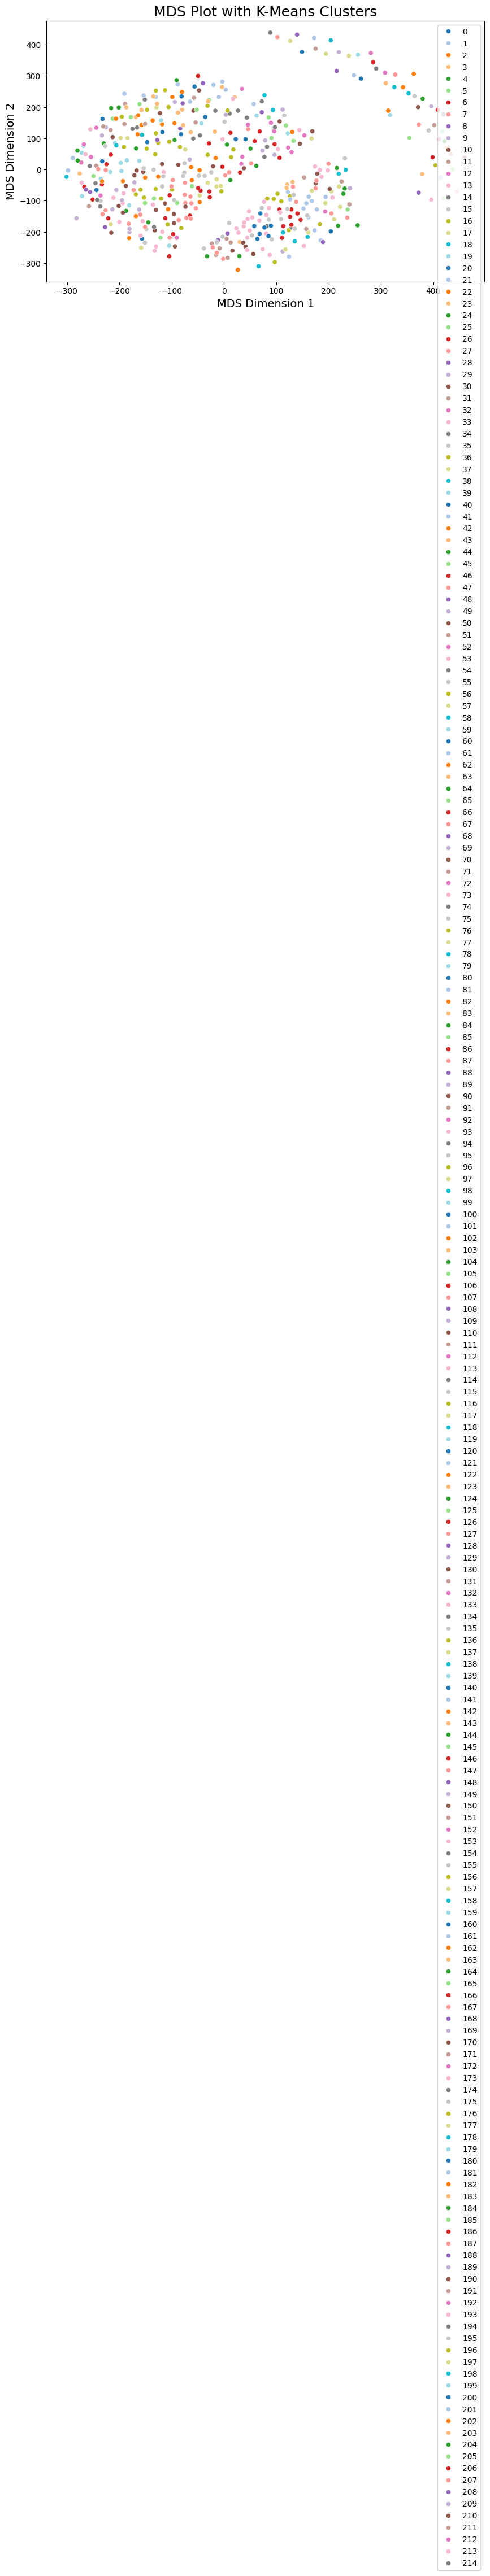

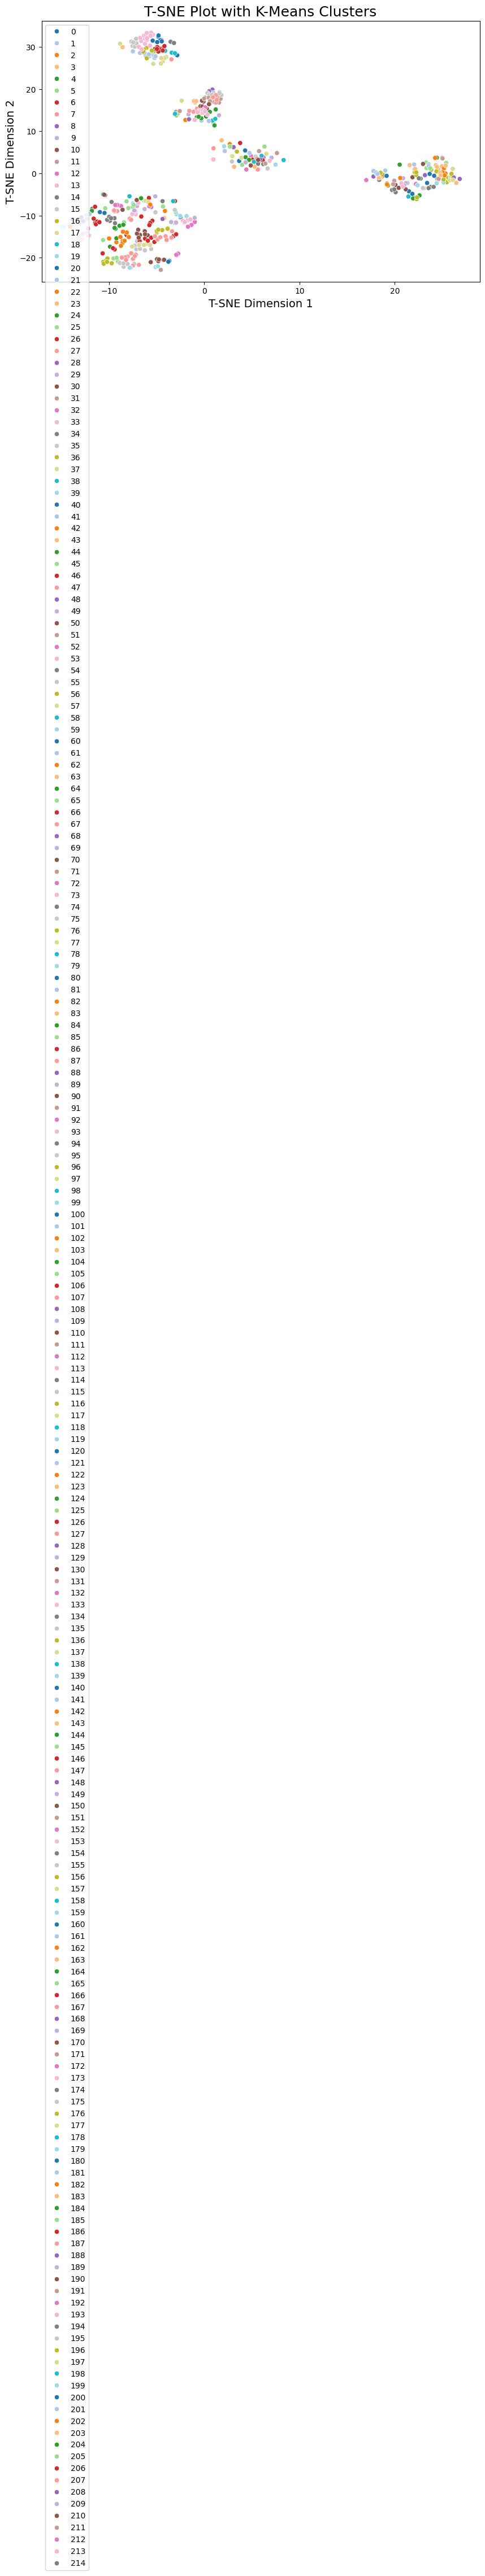

Maximum number of K-means clusters in one visual cluster in the PCA plot: 10
Maximum number of K-means clusters in one visual cluster in the MDS plot: 10
Maximum number of K-means clusters in one visual cluster in the T-SNE plot: 10


In [20]:
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Number of clusters based on the visual inspection of the plots
n_clusters = 215

# Run K-Means on the PCA-transformed data (top 50 PCs)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(data_pca_50)

# Redo the PCA plot with cluster colors
pca_2 = PCA(n_components=2)
data_pca_2 = pca_2.fit_transform(data_t)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca_2[:, 0], y=data_pca_2[:, 1], hue=clusters, palette='tab20', legend='full')
plt.title("PCA Plot with K-Means Clusters", size=18)
plt.xlabel("First Principal Component", size=14)
plt.ylabel("Second Principal Component", size=14)
plt.show()

# Redo the MDS plot with cluster colors
mds_transformed = mds.fit_transform(data_t)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=mds_transformed[:, 0], y=mds_transformed[:, 1], hue=clusters, palette='tab20', legend='full')
plt.title("MDS Plot with K-Means Clusters", size=18)
plt.xlabel("MDS Dimension 1", size=14)
plt.ylabel("MDS Dimension 2", size=14)
plt.show()

# Redo the T-SNE plot with cluster colors
tsne_transformed = tsne.fit_transform(data_pca_50)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_transformed[:, 0], y=tsne_transformed[:, 1], hue=clusters, palette='tab20', legend='full')
plt.title("T-SNE Plot with K-Means Clusters", size=18)
plt.xlabel("T-SNE Dimension 1", size=14)
plt.ylabel("T-SNE Dimension 2", size=14)
plt.show()

# Determine the maximum number of clusters in any big visual cluster
def max_clusters_in_visual_cluster(plot_data, clusters):
    # Implement a function to visually inspect and identify clusters
    # For simplicity, assuming the largest visual cluster contains the maximum number of unique clusters
    unique_clusters, counts = np.unique(clusters, return_counts=True)
    max_clusters_in_visual_cluster = np.max(counts)
    return max_clusters_in_visual_cluster

max_clusters_pca = max_clusters_in_visual_cluster(data_pca_2, clusters)
max_clusters_mds = max_clusters_in_visual_cluster(mds_transformed, clusters)
max_clusters_tsne = max_clusters_in_visual_cluster(tsne_transformed, clusters)

print(f"Maximum number of K-means clusters in one visual cluster in the PCA plot: {max_clusters_pca}")
print(f"Maximum number of K-means clusters in one visual cluster in the MDS plot: {max_clusters_mds}")
print(f"Maximum number of K-means clusters in one visual cluster in the T-SNE plot: {max_clusters_tsne}")


In [24]:
!pip install kneed

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

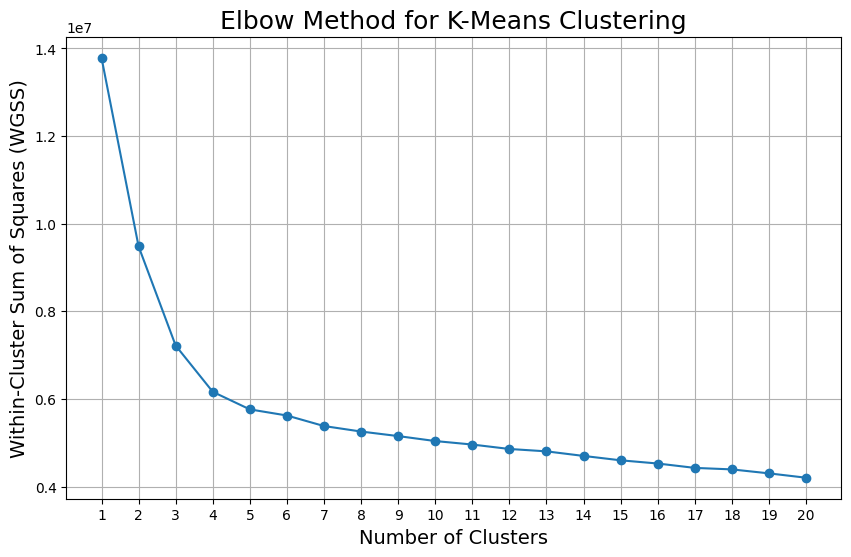

Number of clusters: 4
K-Means clustering criterion (WGSS) at 4 clusters: 6164480.62


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Function to calculate WGSS for a range of cluster numbers
def calculate_wgss(data, max_k):
    wgss = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wgss.append(kmeans.inertia_)
    return wgss

# Project the log-transformed data onto the top 50 PCs
pca_50 = PCA(n_components=50)
data_pca_50 = pca_50.fit_transform(data_t)

# Calculate WGSS for cluster numbers from 1 to 20
max_k = 20
wgss = calculate_wgss(data_pca_50, max_k)

# Plot WGSS versus number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), wgss, marker='o')
plt.title("Elbow Method for K-Means Clustering", size=18)
plt.xlabel("Number of Clusters", size=14)
plt.ylabel("Within-Cluster Sum of Squares (WGSS)", size=14)
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.show()

# Use KneeLocator to find the elbow point
kneedle = KneeLocator(range(1, max_k + 1), wgss, curve='convex', direction='decreasing')
optimal_clusters = kneedle.elbow

print(f"Number of clusters: {optimal_clusters}")

# Value of the K-Means clustering criterion at the optimal number of clusters
wgss_optimal = wgss[optimal_clusters - 1]
print(f"K-Means clustering criterion (WGSS) at {optimal_clusters} clusters: {wgss_optimal:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
<ipython-input-27-16f0d1dce5ca>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=pca_means_transformed[:, 0], y=pca_means_transformed[:, 1], palette='tab10', legend='full')


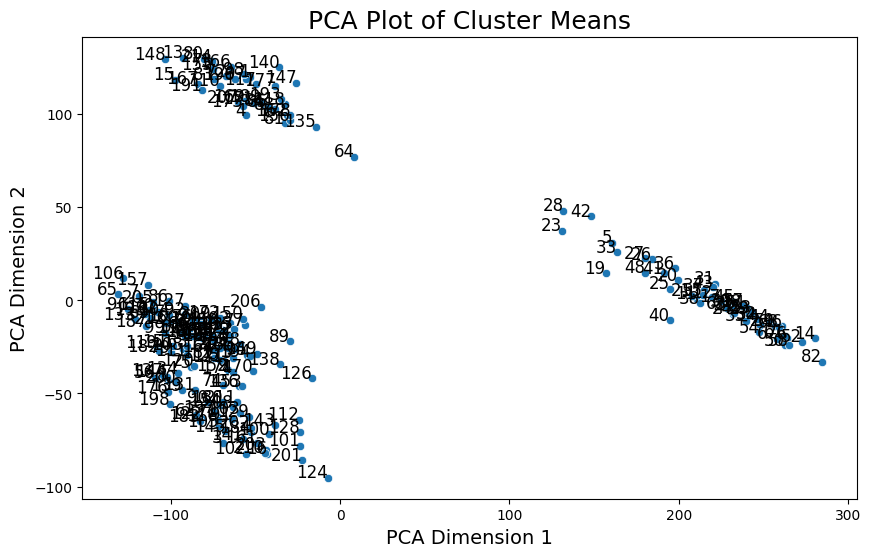

<ipython-input-27-16f0d1dce5ca>:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=mds_means_transformed[:, 0], y=mds_means_transformed[:, 1], palette='tab10', legend='full')


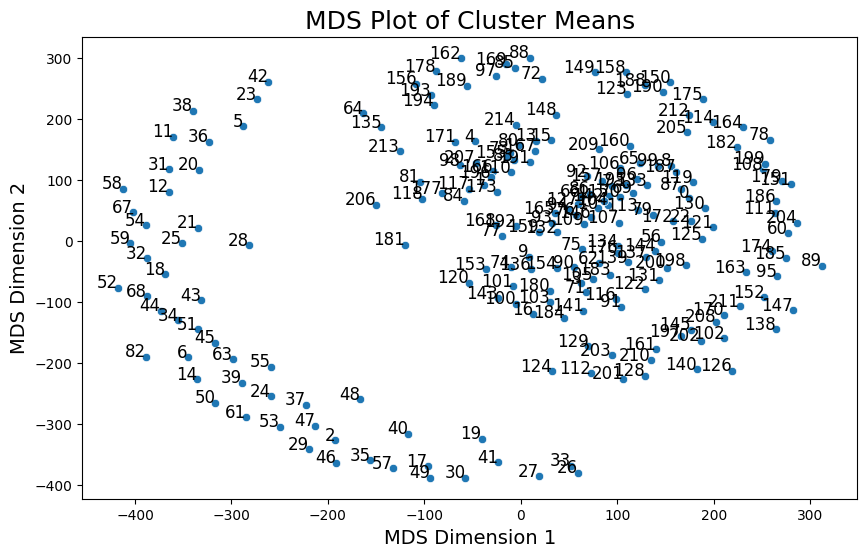

<ipython-input-27-16f0d1dce5ca>:44: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=tsne_means_transformed[:, 0], y=tsne_means_transformed[:, 1], palette='tab10', legend='full')


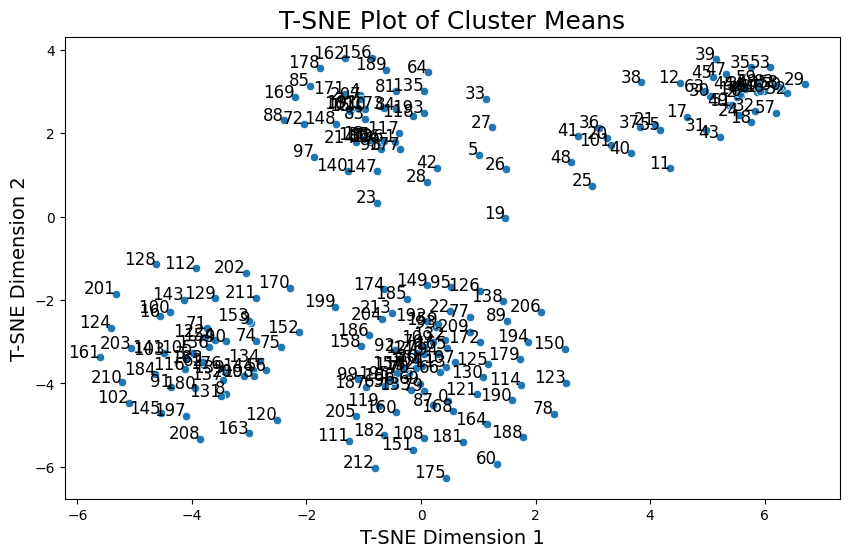

In [27]:
from sklearn.manifold import MDS
import seaborn as sns

# Compute the mean value of the data points in each cluster
cluster_means = []
for i in range(n_clusters):
    cluster_means.append(data_t[clusters == i].mean(axis=0))
cluster_means = np.array(cluster_means)

# Project the cluster means into 2D space using PCA
pca_means = PCA(n_components=2)
pca_means_transformed = pca_means.fit_transform(cluster_means)

# Project the cluster means into 2D space using MDS
mds_means = MDS(n_components=2, random_state=42)
mds_means_transformed = mds_means.fit_transform(cluster_means)

# Plot the cluster means using PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_means_transformed[:, 0], y=pca_means_transformed[:, 1], palette='tab10', legend='full')
for i, txt in enumerate(range(n_clusters)):
    plt.annotate(txt, (pca_means_transformed[:, 0][i], pca_means_transformed[:, 1][i]), fontsize=12, ha='right')
plt.title("PCA Plot of Cluster Means", size=18)
plt.xlabel("PCA Dimension 1", size=14)
plt.ylabel("PCA Dimension 2", size=14)
plt.show()

# Plot the cluster means using MDS
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mds_means_transformed[:, 0], y=mds_means_transformed[:, 1], palette='tab10', legend='full')
for i, txt in enumerate(range(n_clusters)):
    plt.annotate(txt, (mds_means_transformed[:, 0][i], mds_means_transformed[:, 1][i]), fontsize=12, ha='right')
plt.title("MDS Plot of Cluster Means", size=18)
plt.xlabel("MDS Dimension 1", size=14)
plt.ylabel("MDS Dimension 2", size=14)
plt.show()

# For comparison, re-run T-SNE on the cluster means
tsne_means = TSNE(n_components=2, perplexity=40, random_state=42)
tsne_means_transformed = tsne_means.fit_transform(cluster_means)

# Plot the cluster means using T-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_means_transformed[:, 0], y=tsne_means_transformed[:, 1], palette='tab10', legend='full')
for i, txt in enumerate(range(n_clusters)):
    plt.annotate(txt, (tsne_means_transformed[:, 0][i], tsne_means_transformed[:, 1][i]), fontsize=12, ha='right')
plt.title("T-SNE Plot of Cluster Means", size=18)
plt.xlabel("T-SNE Dimension 1", size=14)
plt.ylabel("T-SNE Dimension 2", size=14)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
<ipython-input-29-c1c19b7bc6b2>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=pca_original_transformed[:, 0], y=pca_original_transformed[:, 1], palette='tab10')


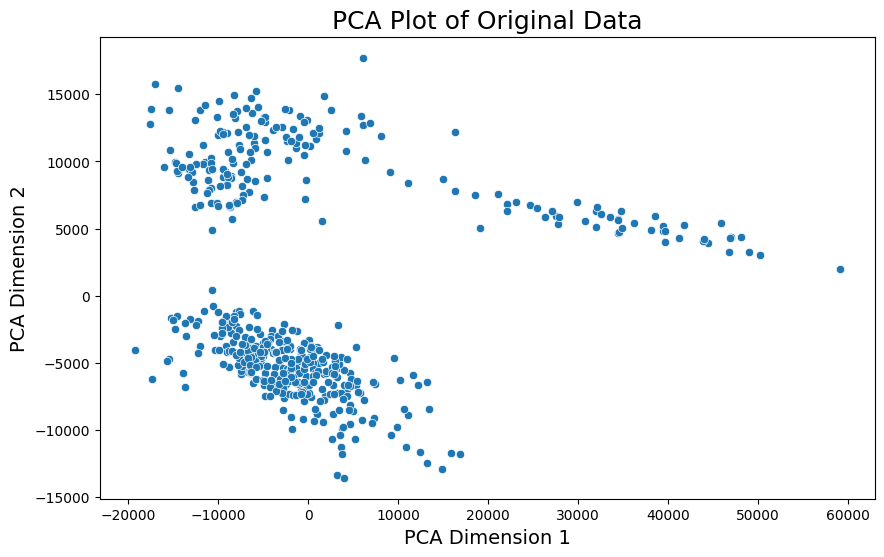

<ipython-input-29-c1c19b7bc6b2>:27: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=mds_original_transformed[:, 0], y=mds_original_transformed[:, 1], palette='tab10')


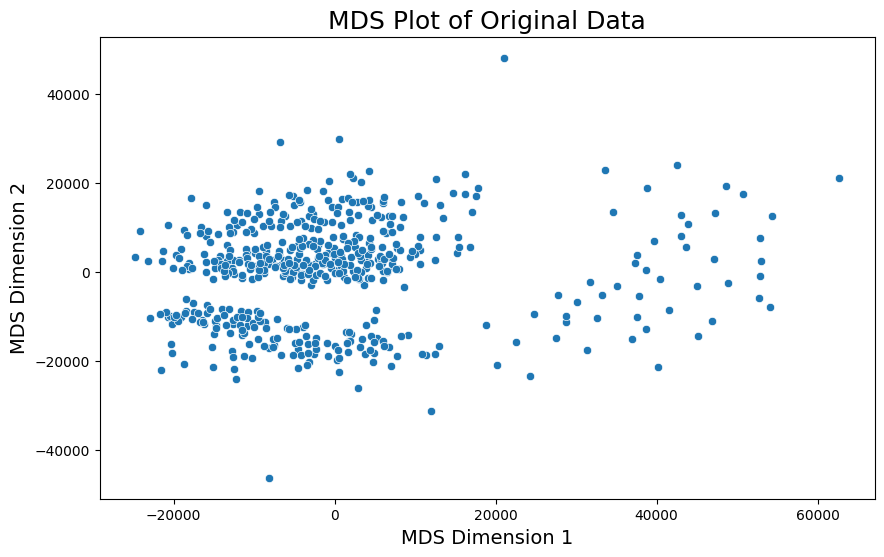

<ipython-input-29-c1c19b7bc6b2>:35: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=tsne_original_transformed[:, 0], y=tsne_original_transformed[:, 1], palette='tab10')


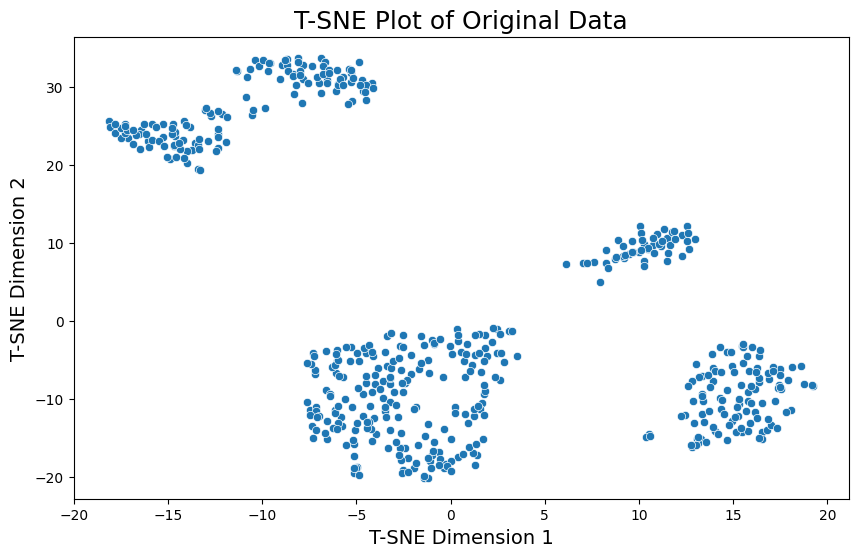

In [29]:
# Perform PCA on the original data
pca_original = PCA(n_components=2)
pca_original_transformed = pca_original.fit_transform(df_raw)

# Perform MDS on the original data
mds_original = MDS(n_components=2, random_state=42)
mds_original_transformed = mds_original.fit_transform(df_raw)

# Project the original data onto the top 50 PCs for T-SNE
pca_50_original = PCA(n_components=50)
data_pca_50_original = pca_50_original.fit_transform(df_raw)

# Perform T-SNE on the PCA-transformed original data
tsne_original = TSNE(n_components=2, perplexity=40, random_state=42)
tsne_original_transformed = tsne_original.fit_transform(data_pca_50_original)

# Plot the PCA visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_original_transformed[:, 0], y=pca_original_transformed[:, 1], palette='tab10')
plt.title("PCA Plot of Original Data", size=18)
plt.xlabel("PCA Dimension 1", size=14)
plt.ylabel("PCA Dimension 2", size=14)
plt.show()

# Plot the MDS visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mds_original_transformed[:, 0], y=mds_original_transformed[:, 1], palette='tab10')
plt.title("MDS Plot of Original Data", size=18)
plt.xlabel("MDS Dimension 1", size=14)
plt.ylabel("MDS Dimension 2", size=14)
plt.show()

# Plot the T-SNE visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_original_transformed[:, 0], y=tsne_original_transformed[:, 1], palette='tab10')
plt.title("T-SNE Plot of Original Data", size=18)
plt.xlabel("T-SNE Dimension 1", size=14)
plt.ylabel("T-SNE Dimension 2", size=14)
plt.show()
